# Comparing Dictionary Structures
### David Rackerby

### Hypothesis
Python has no built-in ordered map, the only map available is `dict` and its derivations. To compare dictionary structure with different backends, we will use the `SortedDict` from the Sorted Containers library at https://grantjenks.com/docs/sortedcontainers/. This data structure is, as implied by its name, a data structure that inherits from the standard `dict` data structure while maintaining a sorted list of keys. This will be compared against the standalone `dict` available as part of the standard library. We will compare the insertion times of both backends to insert the same data. We hypothesize that the unsorted dictionary will take less time to insert elements due to not having to maintain the sorted property. Unsorted `dict` insertions should be constant-time, while the SortedContainers documentation at https://grantjenks.com/docs/sortedcontainers/sorteddict.html states that insert (specifically `__setitem__`) is approximately O(log(n)).

### Methods
The same data inserted into both dictionaries is pseudo-randomly generated. Insertion times will be measured until the total insertion time for either of the dictionaries surpasses 3 seconds. The version of Python used is Python 3.11.2. The version of Matplotlib used is 3.7.1. The pseudo-random number generator used is the Mersenne Twister, which is Python's default generator. The notebook used to produce this report can be found at https://github.com/rikipls/CSE-431-HW-5

Number of elements inserted before 3-second threshold surpassed: 1452197
Time spent on unsorted insertions: 0.3600 seconds
Time spent on sorted insertions: 3.0000 seconds
SortedContainers SortedDict spent more time overall on insertions


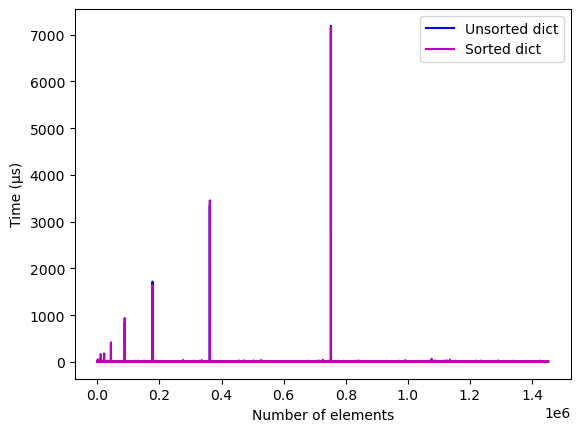

In [19]:
from sortedcontainers import SortedDict

import matplotlib.pyplot as plt

import random
import time

random.seed(431)
NUM_ELEMENTS = 10_000_000

population = [random.randint(0, NUM_ELEMENTS) for _ in range(NUM_ELEMENTS)]

unsorted_dict_insertion_time = [0] * NUM_ELEMENTS
total_unsorted_insertion_time = 0
sorted_dict_insertion_time = [0] * NUM_ELEMENTS
total_sorted_insertion_time = 0

unsorted_dict = dict()
sorted_dict = SortedDict()

for i in range(NUM_ELEMENTS):
    sample = random.choice(population)

    # Sorted
    start_sorted = time.monotonic_ns()
    sorted_dict[sample] = sample
    end_sorted = time.monotonic_ns()
    
    sorted_dict_insertion_time[i] = 0.001 * (end_sorted - start_sorted)
    total_sorted_insertion_time += sorted_dict_insertion_time[i]

    # Unsorted
    start_unsorted = time.monotonic_ns()
    unsorted_dict[sample] = sample
    end_unsorted = time.monotonic_ns()

    # Convert to microseconds
    unsorted_dict_insertion_time[i] = 0.001 * (end_unsorted - start_unsorted)
    total_unsorted_insertion_time += unsorted_dict_insertion_time[i]
    
    if total_sorted_insertion_time >= 3e6 or total_unsorted_insertion_time >= 3e6:
        break

# Trim both time collections to the index i, thereafter all measured times are 0 because they were never updated
sorted_dict_insertion_time = sorted_dict_insertion_time[:i+1]
unsorted_dict_insertion_time = unsorted_dict_insertion_time[:i+1]

print(f"Number of elements inserted before 3-second threshold surpassed: {i+1}")
print(f"Time spent on unsorted insertions: {(total_unsorted_insertion_time * 1e-6):.4f} seconds")
print(f"Time spent on sorted insertions: {(total_sorted_insertion_time * 1e-6):.4f} seconds")
if total_unsorted_insertion_time > total_sorted_insertion_time:
    print("Built-in unsorted dict spent more time overall on insertions")
else:
    print("SortedContainers SortedDict spent more time overall on insertions")

plt.plot(unsorted_dict_insertion_time, 'b', label="Unsorted dict")
plt.plot(sorted_dict_insertion_time, 'm', label="Sorted dict")
plt.xlabel("Number of elements")
plt.ylabel("Time (μs)")
plt.legend()
plt.show()

### Results
In a given run, the insertion time of the sorted dictionary was typically one order of magnitude higher than that of the unsorted dictionary. As shown above, the sorted dictionary spent much more time overall on insertions than the unsorted dictionary.

### Discussion
As expected, the sorted dictionary took more time than the unsorted dictionary to insert the same elements due to having to maintain the order of keys in its backend. However, what's surprising is that total of 1.4 million elements were inserted before the total insertion time took 3 seconds. One order of magnitude difference is a smaller gap than expected for that many elements, and the SortedDict still performed very well given its asymptotic restriction.

### Conclusions
The unsorted dictionary spent less time on insertions overall. It took 3 seconds to insert roughly 1.4 million elements into the sorted dictionary while it took 0.36 seconds to insert the same number of elements into the unsorted dictionary.